In [246]:
import pandas as pd 
import numpy as np
import os
import seaborn as sn
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier



# Random Forest company

In [33]:
df = pd.read_csv(r"C:\\Users\\Adith\\Desktop\\Data Science_Excel R\\home assignments\\decision tree\\Company_Data.csv")

In [34]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [35]:
#checking with shape of data 
df.shape

(400, 11)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# EDA and Visualization

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

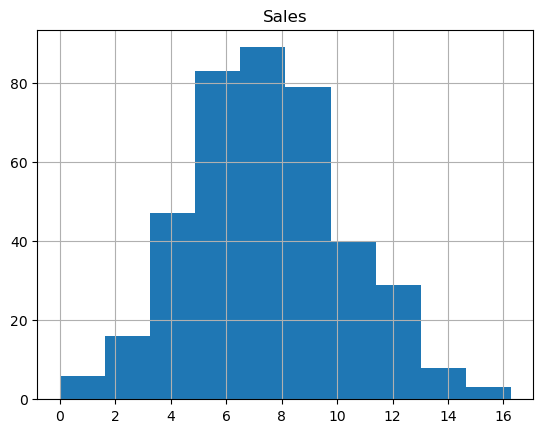

In [37]:
#plotting histogram for sales data 
df.hist('Sales')

In [38]:
df.describe ()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [39]:
16.27000/2

8.135

In [40]:
8.135/2

4.0675

# since sales is normally distributed we can take mean as threshold and make two categories >7.5 as high = 1 ,  7.5 as low =0

In [41]:
#converting our sales data to categorical column
df1 = df.copy()
df1['Sales_cat'] = pd.cut(x = df['Sales'], bins = [0,7.5,17],labels =['low','high'],right = False)
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      high  
1         10   Yes  Yes      high  
2         12   Yes  Yes      high  
3         14   Yes  Yes       low  
4         13   Yes   No       low

In [42]:
#checking with sales_cat value counts 
df1.Sales_cat.value_counts()

low     201
high    199
Name: Sales_cat, dtype: int64

In [43]:
#converting Urban to unique value where no = 0 and yes = 1
label_encoder = preprocessing.LabelEncoder()
df1['Urban'] = label_encoder.fit_transform(df1['Urban'])



In [44]:
#converting US to unique value where no = 0 and yes = 1
label_encoder = preprocessing.LabelEncoder()
df1['US'] = label_encoder.fit_transform(df1['US'])



In [45]:
#converting shelveloc to unique value where bad = 0 ,good = 1,
label_encoder = preprocessing.LabelEncoder()
df1['ShelveLoc'] = label_encoder.fit_transform(df1['ShelveLoc'])
df1.head()


Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US Sales_cat  
0         17      1   1      high  
1         10      1   1      high  
2         12      1   1      high  
3         14      1   1       low  
4         13      1   0       low

In [46]:
#dropping original sales feature 
df2 = df1.drop(['Sales'],axis = 1)
df2.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US Sales_cat  
0         17      1   1      high  
1         10      1   1      high  
2         12      1   1      high  
3         14      1   1       low  
4         13      1   0       low

CompPrice


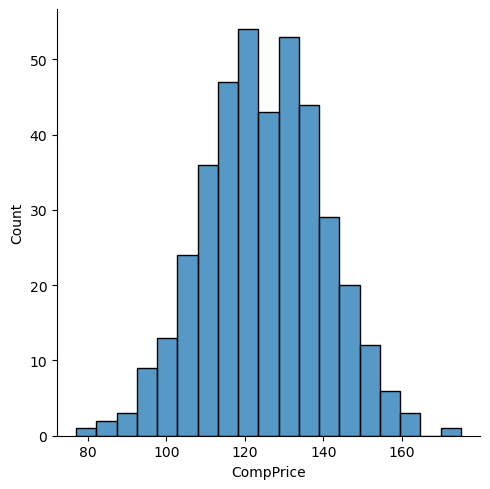

<Figure size 2000x700 with 0 Axes>

Income


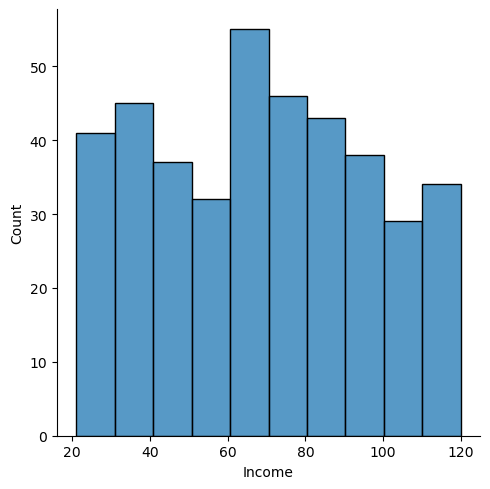

<Figure size 2000x700 with 0 Axes>

Advertising


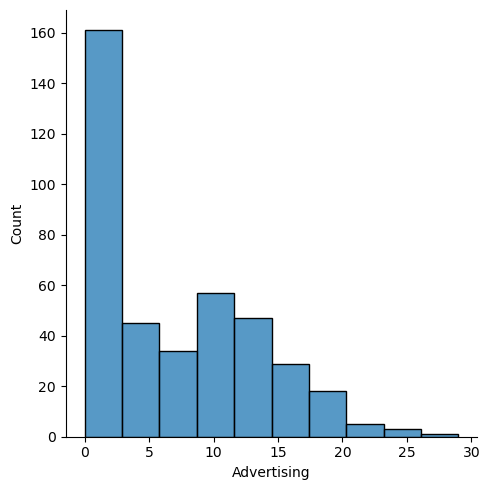

<Figure size 2000x700 with 0 Axes>

Population


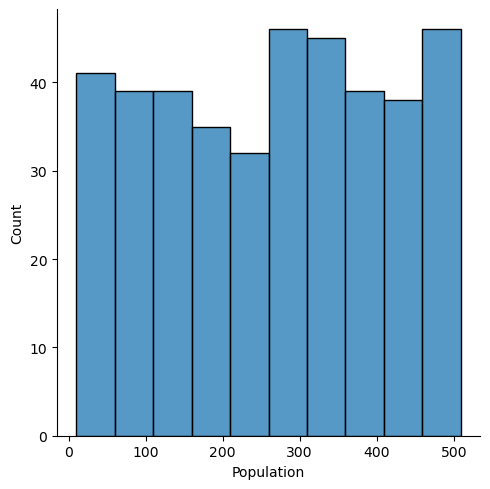

<Figure size 2000x700 with 0 Axes>

Price


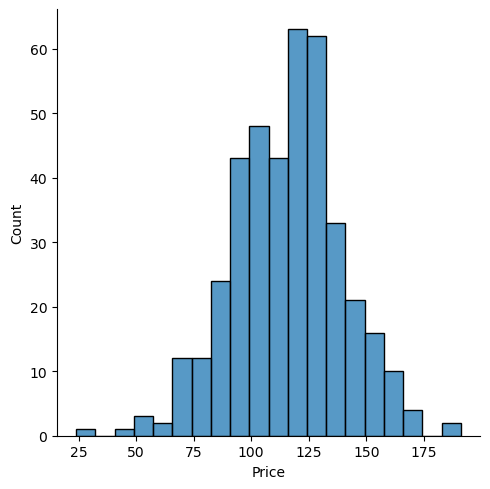

<Figure size 2000x700 with 0 Axes>

ShelveLoc


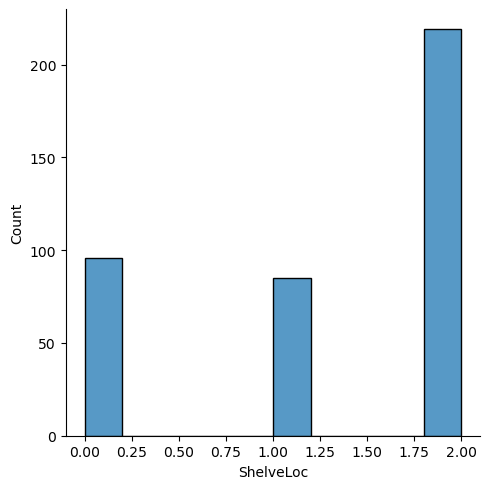

<Figure size 2000x700 with 0 Axes>

Age


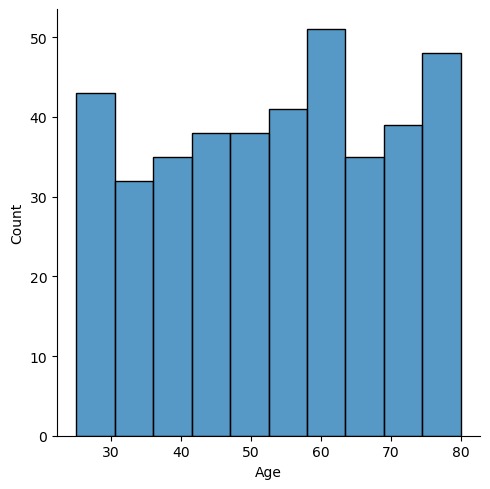

<Figure size 2000x700 with 0 Axes>

Education


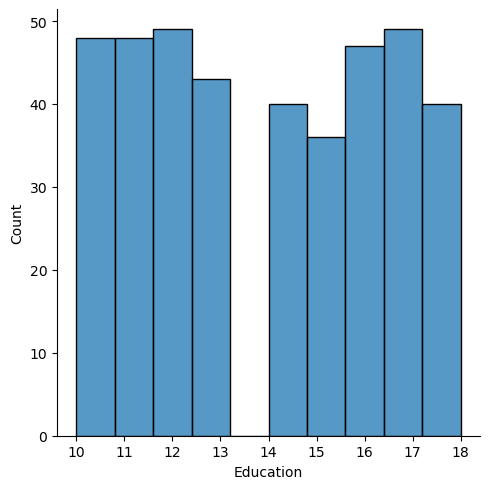

<Figure size 2000x700 with 0 Axes>

Urban


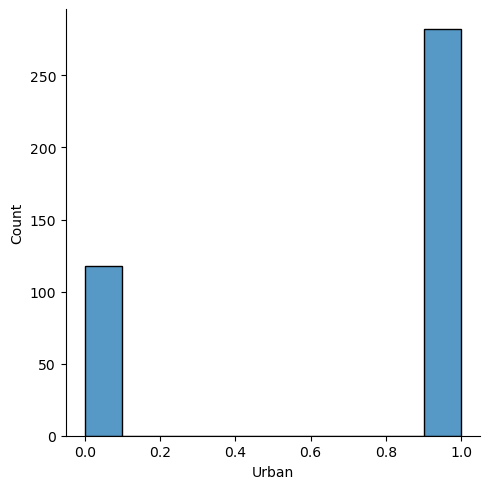

<Figure size 2000x700 with 0 Axes>

US


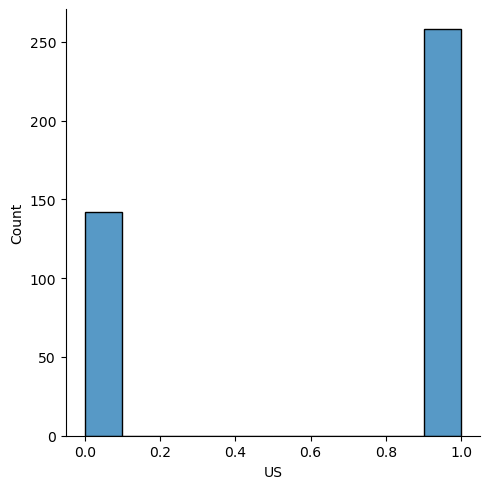

<Figure size 2000x700 with 0 Axes>

Sales_cat


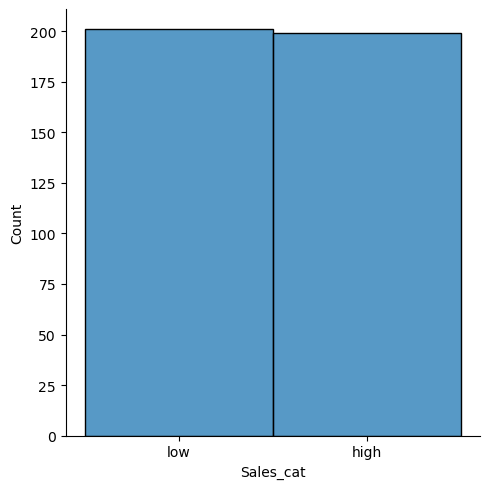

<Figure size 2000x700 with 0 Axes>

In [93]:
#checking distribution of data, analysis for skewness and kurtosis

for n in df2.columns:
    print(n)
    sn.displot(df2[n])
    plt.figure(figsize=(20,7))
    plt.show()

CompPrice


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


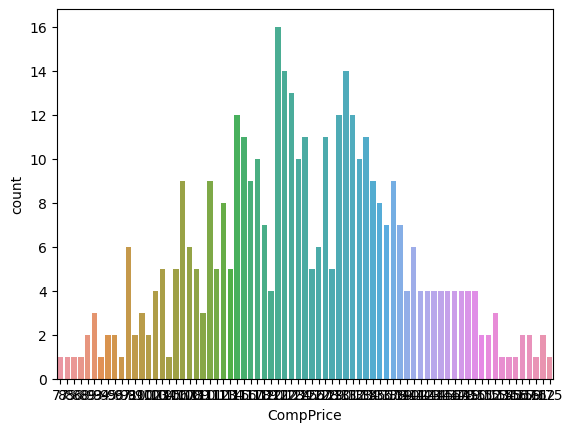

<Figure size 2000x700 with 0 Axes>

Income


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


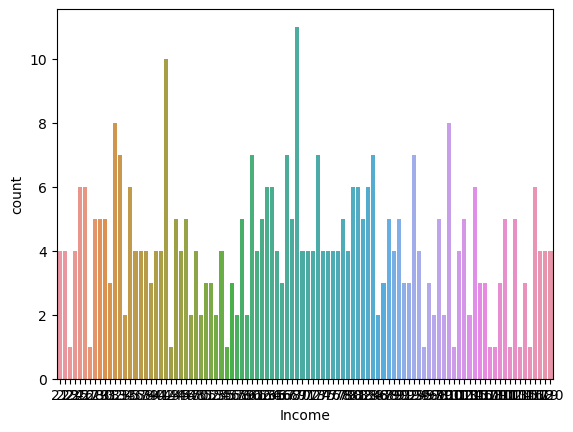

<Figure size 2000x700 with 0 Axes>

Advertising


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


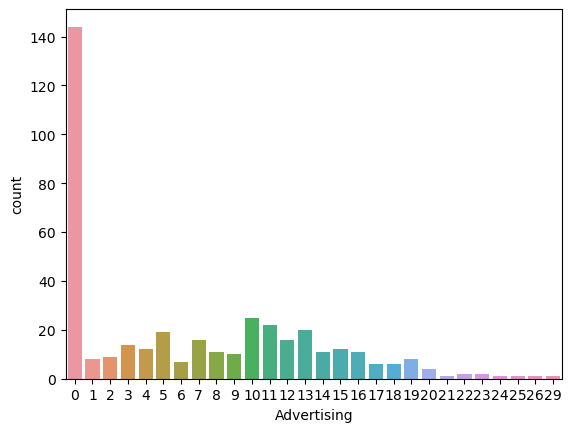

<Figure size 2000x700 with 0 Axes>

Population


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


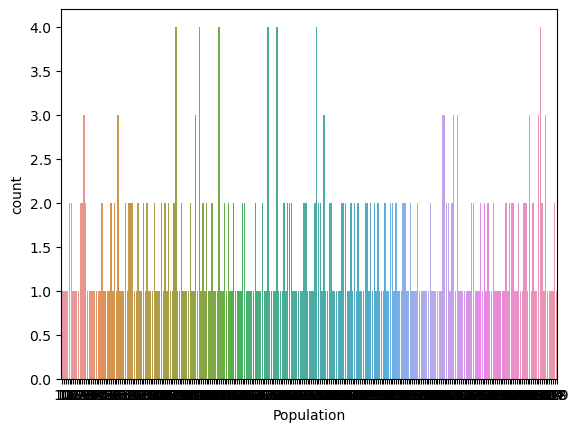

<Figure size 2000x700 with 0 Axes>

Price


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


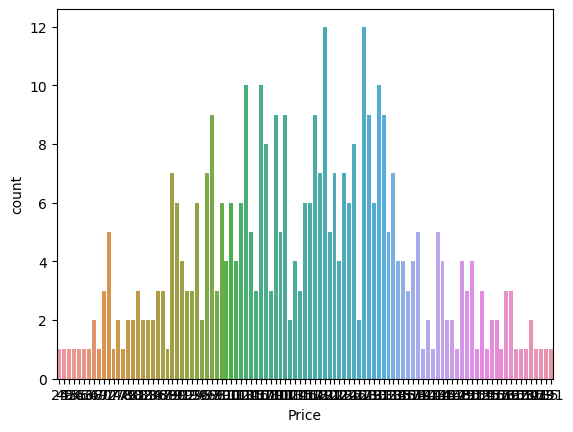

<Figure size 2000x700 with 0 Axes>

ShelveLoc


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


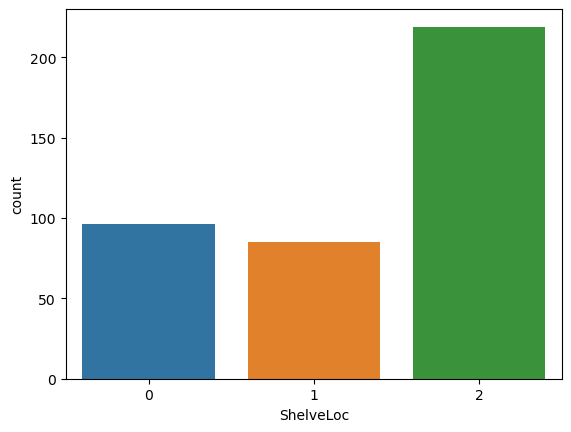

<Figure size 2000x700 with 0 Axes>

Age


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


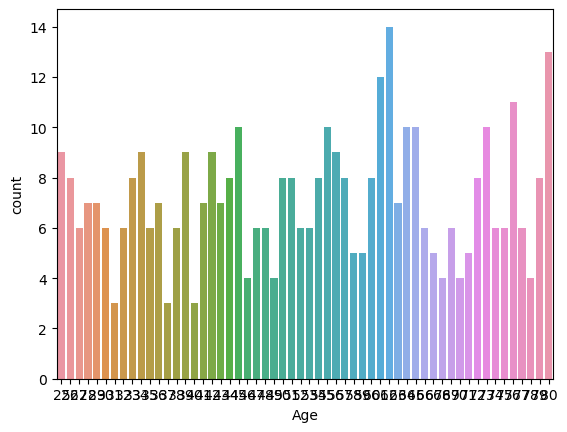

<Figure size 2000x700 with 0 Axes>

Education


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


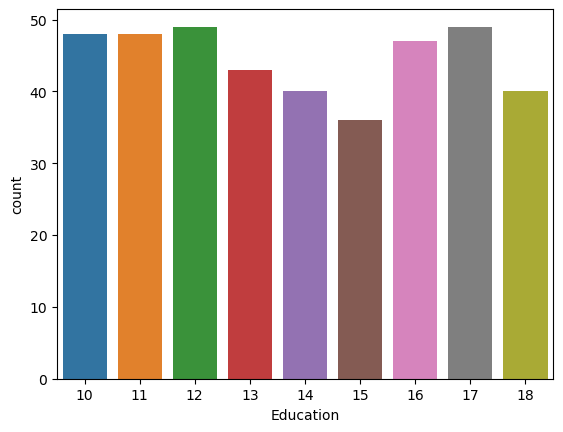

<Figure size 2000x700 with 0 Axes>

Urban


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


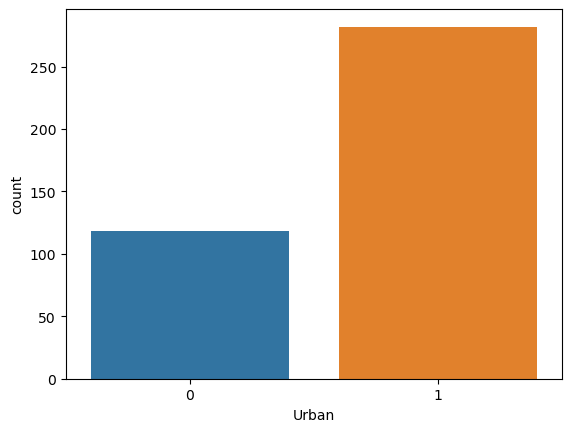

<Figure size 2000x700 with 0 Axes>

US


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


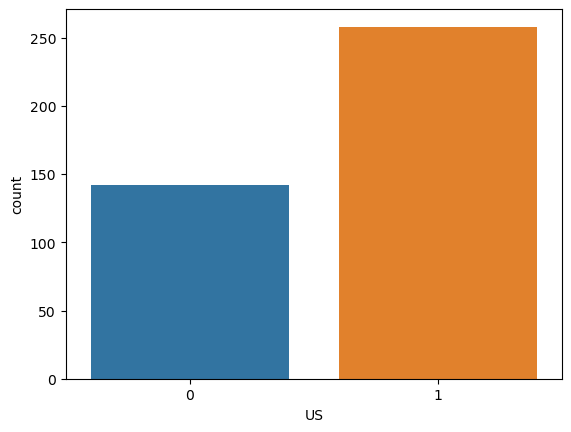

<Figure size 2000x700 with 0 Axes>

Sales_cat


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


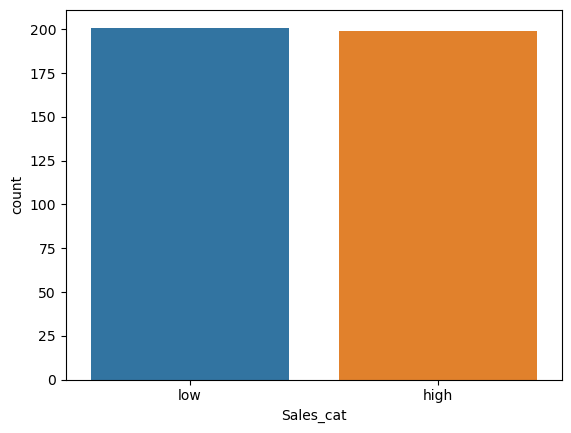

<Figure size 2000x700 with 0 Axes>

In [47]:
#checking data with countplot 

for n in df2.columns:
    print(n)
    sn.countplot(df2[n])
    plt.figure(figsize=(20,7))
    plt.show()

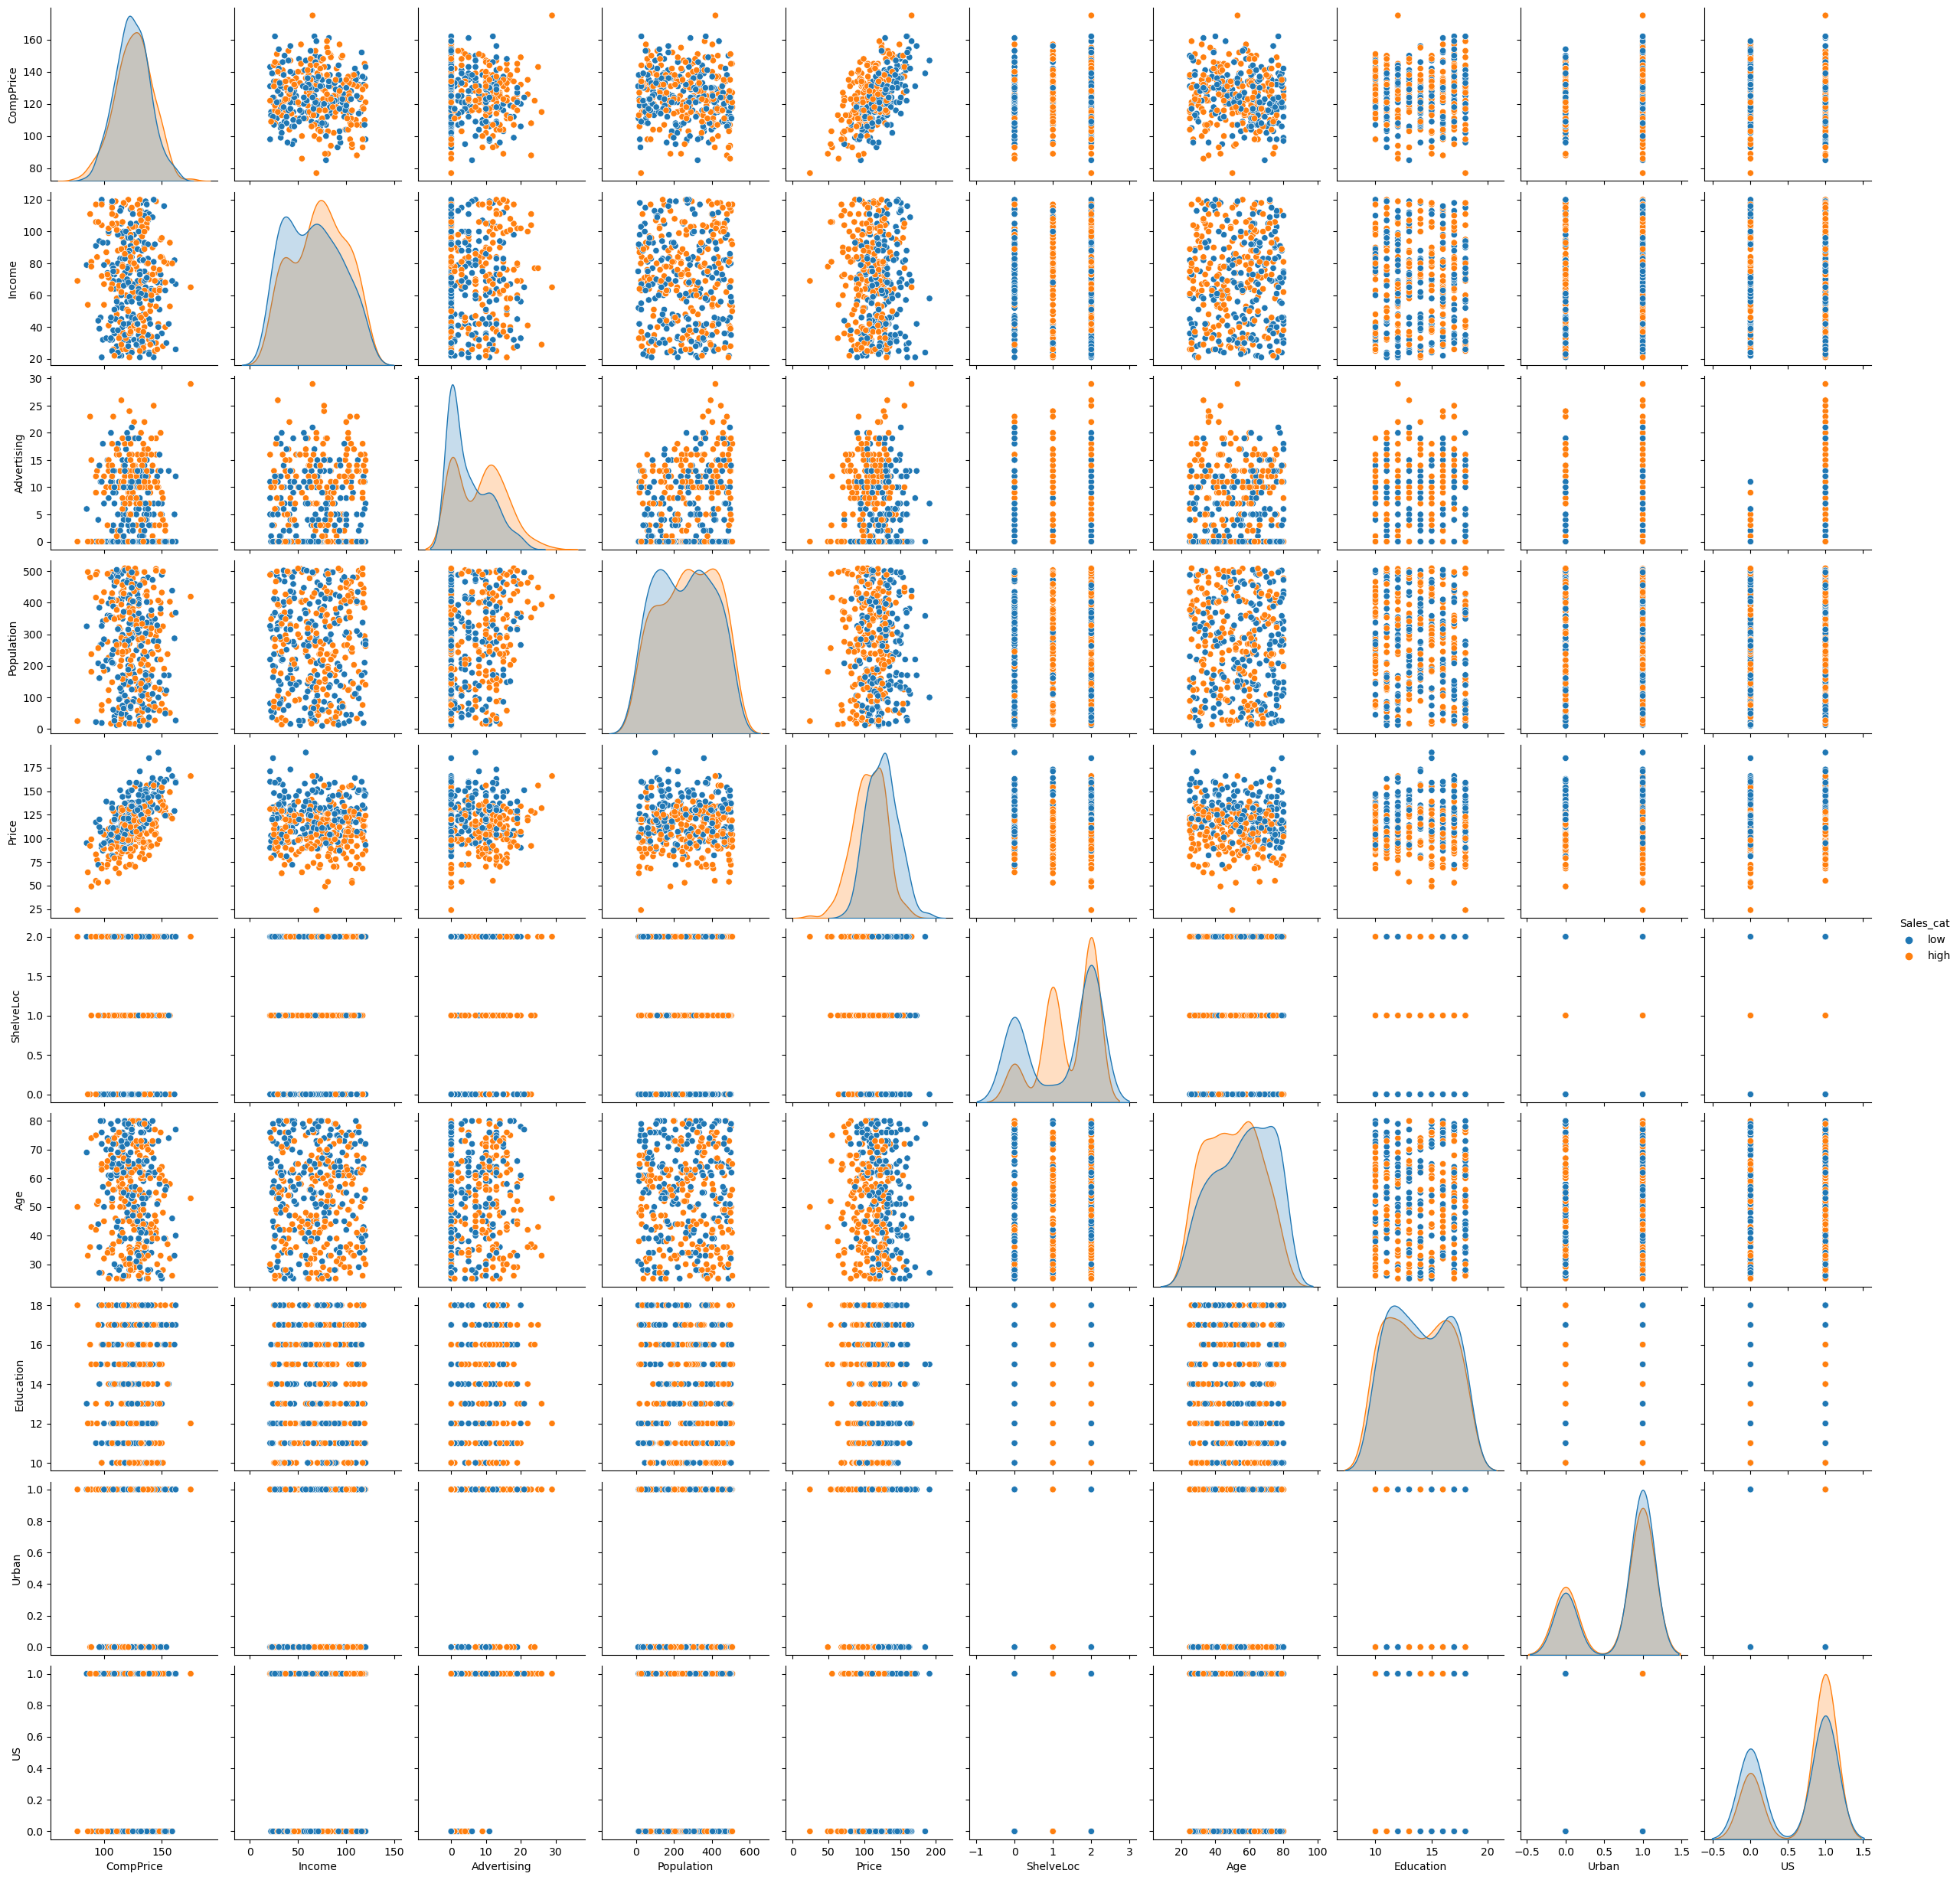

In [48]:
#visualizing by pairplot 
sn.pairplot(data=df2,hue = 'Sales_cat')

<AxesSubplot:>

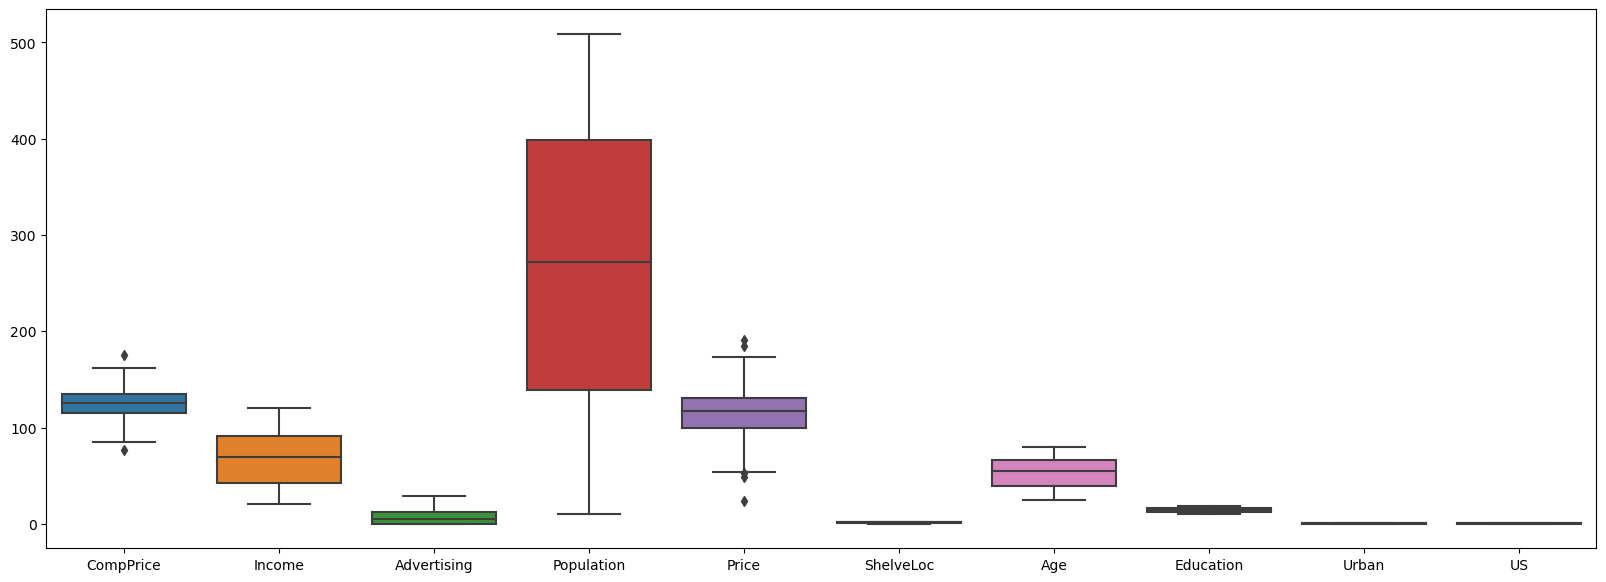

In [49]:
#checking for any outliers 
plt.figure(figsize=(20,7))
sn.boxplot(data = df2)

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompPrice'>

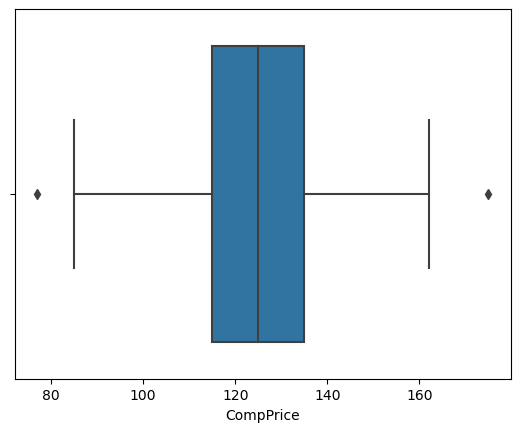

In [50]:
#checking the outliers with Comp price
sn.boxplot(df2['CompPrice'])

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

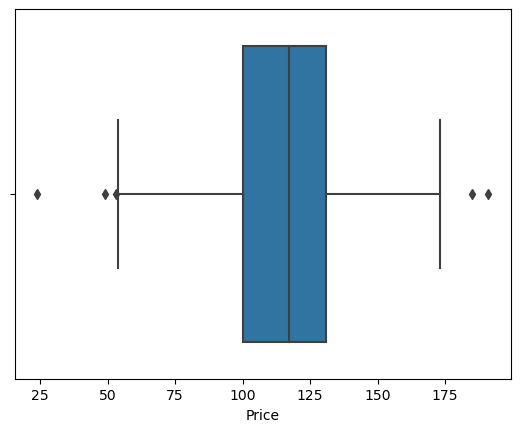

In [51]:
#checking the outliers in Price
sn.boxplot(df2['Price'])

In [52]:
## Random forest handles outliers by essentially binning them we leave the outliers as it is ##

In [53]:
df2.shape

(400, 11)

In [54]:
#transforming our sales category to category
df2['Sales_cat'] = df2['Sales_cat'].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    int32   
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    int32   
 9   US           400 non-null    int32   
 10  Sales_cat    400 non-null    category
dtypes: category(1), int32(3), int64(7)
memory usage: 27.2 KB


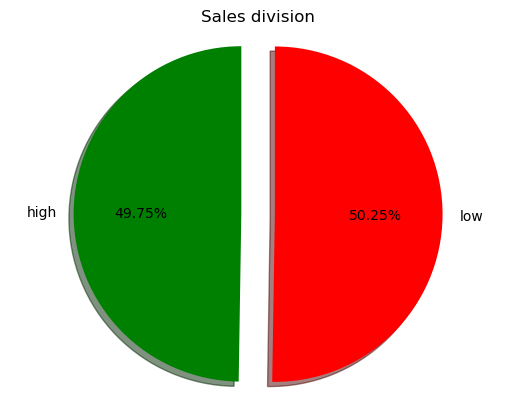

In [112]:
#sales division using pie chart
labels =['high','low']
colors =['green','red']
sizes = [199,201]
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=True,
       explode= (0.1,0.1),autopct ='%1.2f%%')
plt.title('Sales division')
plt.axis('equal')
plt.show()

In [55]:
#checking with sales_cat value counts 
df2.Sales_cat.value_counts()

low     201
high    199
Name: Sales_cat, dtype: int64

In [56]:
#renaming the column sales_cat:sales
df3 = df2.rename({'Sales_cat':'Sales'},axis = 1)

CompPrice


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


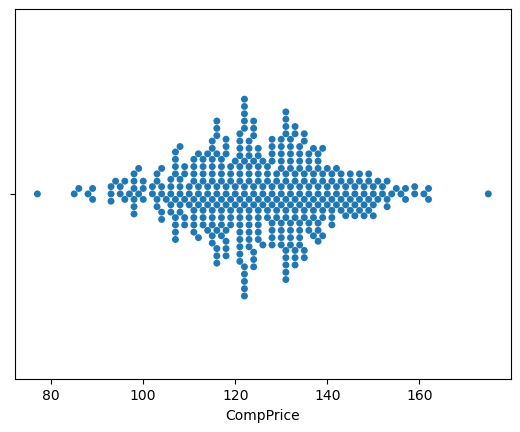

<Figure size 2000x700 with 0 Axes>

Income


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


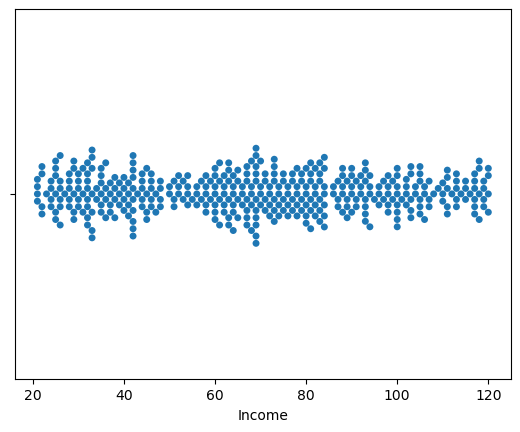

<Figure size 2000x700 with 0 Axes>

Advertising


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adith\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


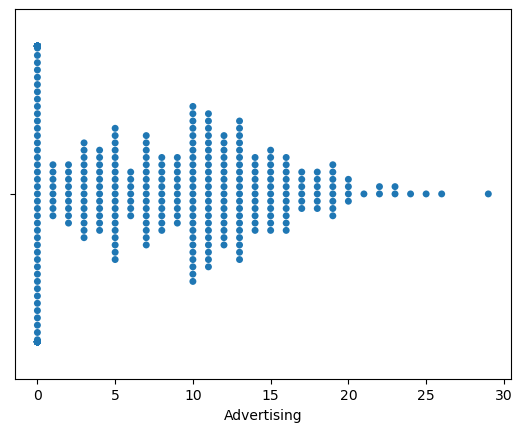

<Figure size 2000x700 with 0 Axes>

Population


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


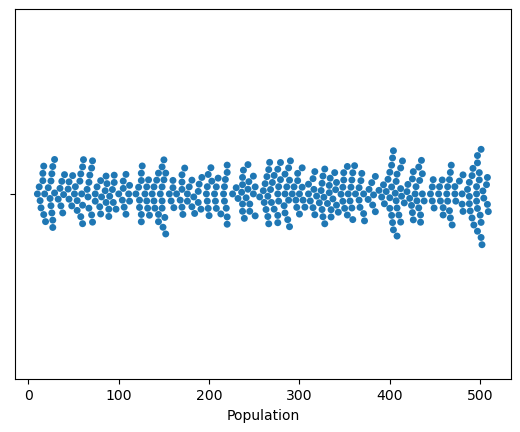

<Figure size 2000x700 with 0 Axes>

Price


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


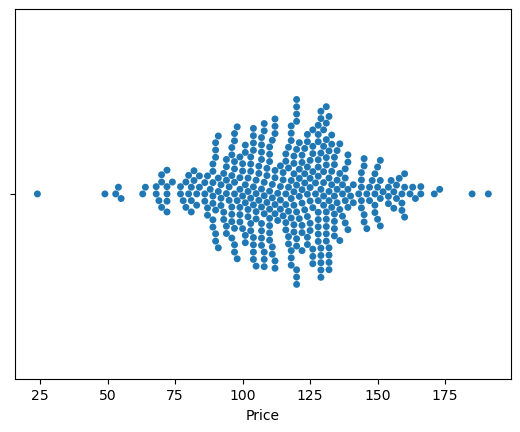

<Figure size 2000x700 with 0 Axes>

ShelveLoc


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adith\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


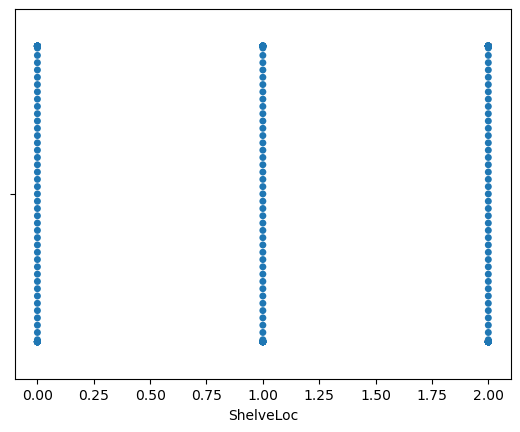

<Figure size 2000x700 with 0 Axes>

Age


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


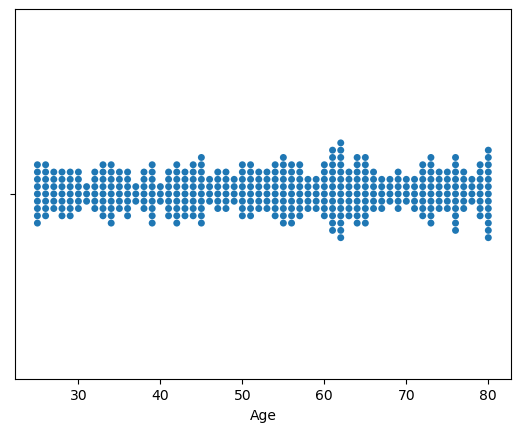

<Figure size 2000x700 with 0 Axes>

Education


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adith\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


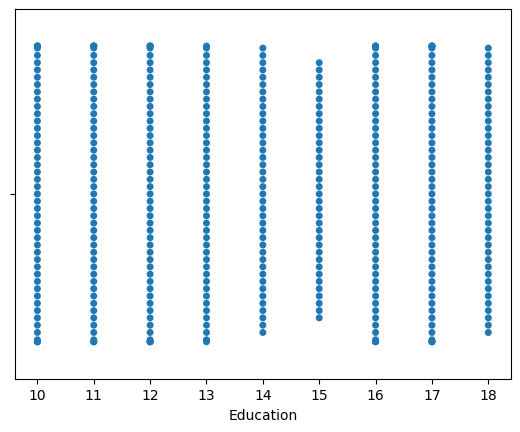

<Figure size 2000x700 with 0 Axes>

Urban


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adith\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


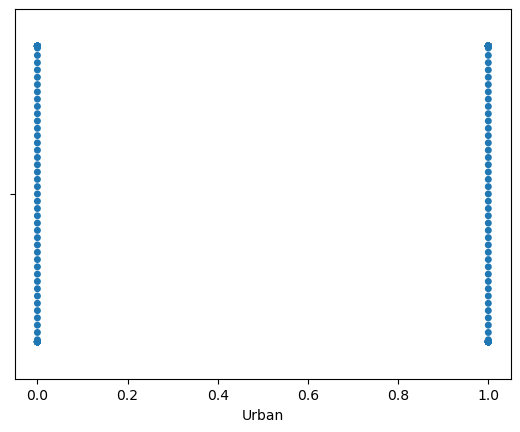

<Figure size 2000x700 with 0 Axes>

US


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adith\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


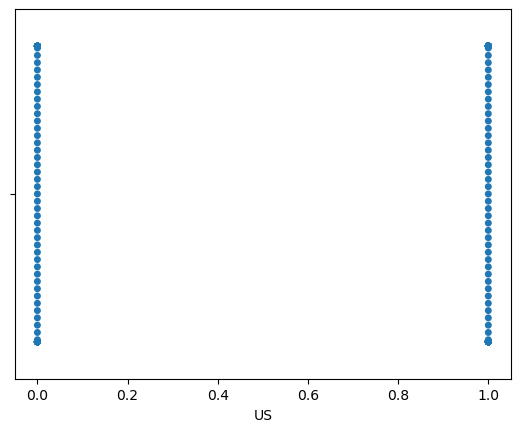

<Figure size 2000x700 with 0 Axes>

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Sales_cat


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


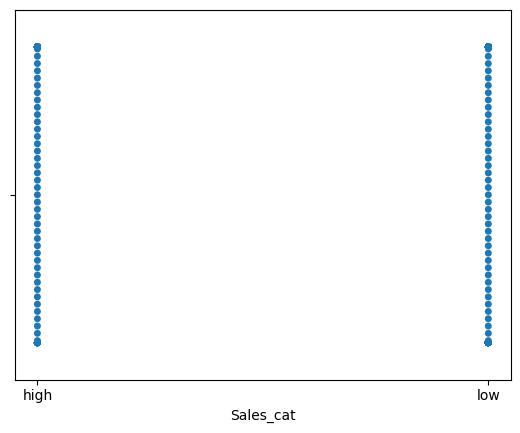

<Figure size 2000x700 with 0 Axes>

In [91]:
#checking representation of categorical variables without overlapping of points 

for n in df2.columns:
    print(n)
    sn.swarmplot(df2[n])
    plt.figure(figsize=(20,7))
    plt.show()

In [57]:
#checking for correlation 
df3.corr()

CompPrice    Income  Advertising  Population     Price  \
CompPrice     1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price         0.584848 -0.056698     0.044537   -0.012144  1.000000   
ShelveLoc     0.023350 -0.067678     0.008544   -0.044772  0.014633   
Age          -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education     0.025197 -0.056855    -0.033594   -0.106378  0.011747   
Urban         0.066594  0.037967     0.042035   -0.052025  0.047016   
US            0.016869  0.089601     0.684460    0.060564  0.057861   

             ShelveLoc       Age  Education     Urban        US  
CompPrice     0.023350 -0.100239   0.025197  0.066594  0.016869  
Income       -0.067678 -0.004670  -0.056855  0.037967  0.089601  
Advertising   0.008544 -0.004557  -0.033594  0.042035  0.684460  
Population   -0.044772 -0.042663  -0.106378 -0.052025  0.060564  
Price         0.014633 -0.102177   0.011747  0.047016  0.057861  
ShelveLoc     1.000000  0.056488   0.001492 -0.063978 -0.039760  
Age           0.056488  1.000000   0.006488  0.028479  0.008652  
Education     0.001492  0.006488   1.000000 -0.033094 -0.078250  
Urban        -0.063978  0.028479  -0.033094  1.000000  0.047085  
US           -0.039760  0.008652  -0.078250  0.047085  1.000000

<AxesSubplot:>

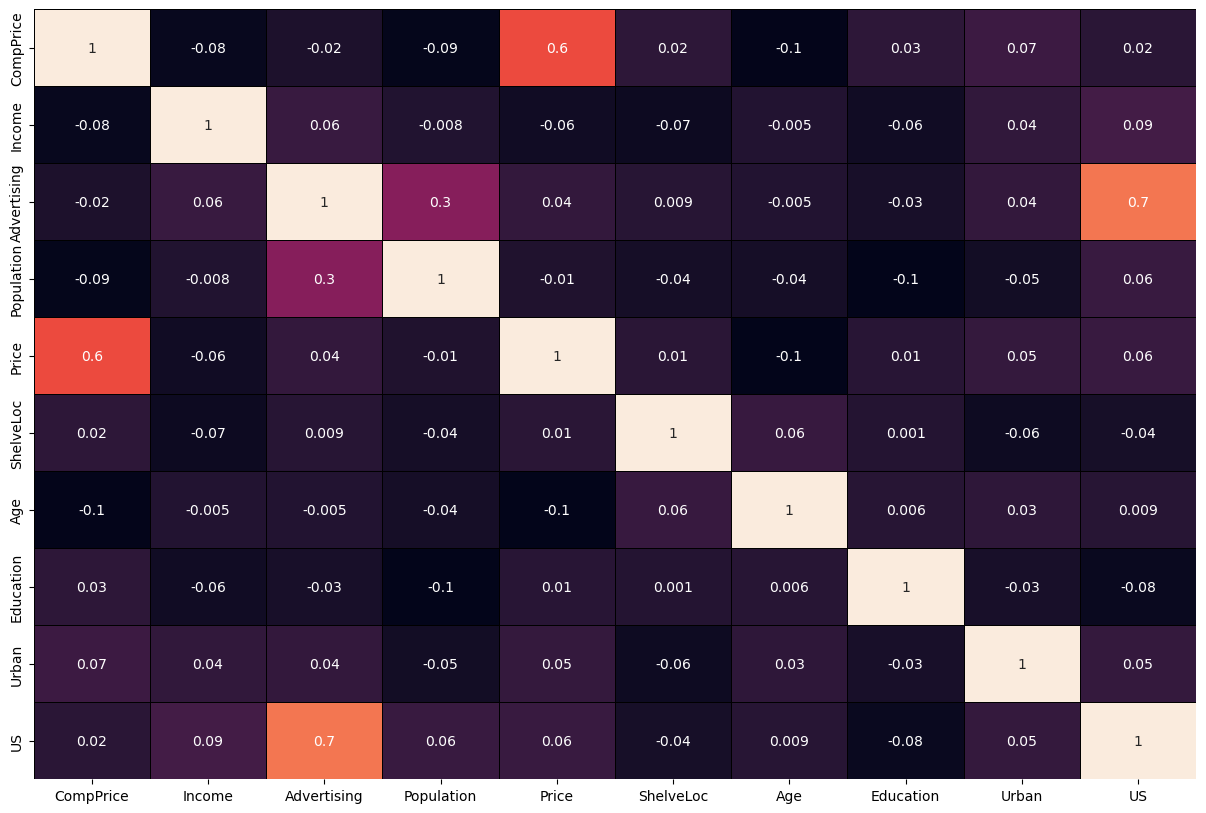

In [99]:
#*Pearson's Correlation Coefficient*: helps you find out the relationship between two quantities
fig,ax = plt.subplots(figsize = (15,10))
sn.heatmap(df3.corr(),annot=True,fmt='.1g',cbar=False,linewidths='0.5',linecolor='black')

In [101]:
df3.shape


(400, 11)

In [102]:
#splitting our data 
X = df3.iloc[:,0:10]
Y = df3['Sales']

In [106]:
#splitting our data into train and test 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,random_state= 42 )

In [108]:
#checking our balance of data after train test split
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', Y_train.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (320, 10)
Training Labels Shape: (80, 10)
Testing Features Shape: (320,)
Testing Labels Shape: (80,)


# checking parameters with grid search cv

In [63]:
param_grid = {
    'bootstrap':[True],
    'max_depth':[2,3,4,5,6,7,8],
    'max_features':[2,3,4,5,6],
    'min_samples_split':[2,4,6],
    'min_samples_split':[4,8,12],
    'n_estimators':[20,40,60,100]
}

model1 = RandomForestClassifier()
grid_search = GridSearchCV(estimator=model1,param_grid=param_grid,cv = 3,n_jobs= -1,verbose=2)
grid_search.fit(X_train,Y_train)


Fitting 3 folds for each of 420 candidates, totalling 1260 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_split': [4, 8, 12],
                         'n_estimators': [20, 40, 60, 100]},
             verbose=2)

In [64]:
final_model = grid_search.best_params_
final_model

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 5,
 'min_samples_split': 4,
 'n_estimators': 60}

In [65]:
best_grid = grid_search.best_estimator_
best_grid


RandomForestClassifier(max_depth=8, max_features=5, min_samples_split=4,
                       n_estimators=60)

In [253]:
#cross validation using Kfold 
kfold = KFold(n_splits=4)
max_features = 6
num_trees = 20

model = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
results = cross_val_score(model,X_train,Y_train,cv= kfold)
print(results.mean())

0.7437499999999999


# building our random forest with all hyperparameters


In [67]:
model2 = RandomForestClassifier(bootstrap=True,max_depth=7,max_features=6,min_samples_split=4,n_estimators = 20)

model2.fit(X_train,Y_train)

RandomForestClassifier(max_depth=7, max_features=6, min_samples_split=4,
                       n_estimators=20)

In [68]:
#checking all the trees 
model2.estimators_

[DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_split=4,
                        random_state=999942226),
 DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_split=4,
                        random_state=1793098285),
 DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_split=4,
                        random_state=154380406),
 DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_split=4,
                        random_state=1468949269),
 DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_split=4,
                        random_state=1474751447),
 DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_split=4,
                        random_state=2026199580),
 DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_split=4,
                        random_state=521026515),
 DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_split=4,
                        random_state=1761579936),
 DecisionTr

[Text(0.6598837209302325, 0.9375, 'Age <= 73.5\ngini = 0.5\nsamples = 191\nvalue = [150, 150]\nclass = high'),
 Text(0.45930232558139533, 0.8125, 'Price <= 130.5\ngini = 0.494\nsamples = 164\nvalue = [141, 113]\nclass = high'),
 Text(0.20930232558139536, 0.6875, 'Education <= 10.5\ngini = 0.441\nsamples = 123\nvalue = [131, 64]\nclass = high'),
 Text(0.18604651162790697, 0.5625, 'gini = 0.0\nsamples = 14\nvalue = [26, 0]\nclass = high'),
 Text(0.23255813953488372, 0.5625, 'ShelveLoc <= 0.5\ngini = 0.471\nsamples = 109\nvalue = [105, 64]\nclass = high'),
 Text(0.10465116279069768, 0.4375, 'Income <= 41.5\ngini = 0.461\nsamples = 32\nvalue = [18, 32]\nclass = low'),
 Text(0.046511627906976744, 0.3125, 'Age <= 49.5\ngini = 0.245\nsamples = 4\nvalue = [6, 1]\nclass = high'),
 Text(0.023255813953488372, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [6, 0]\nclass = high'),
 Text(0.06976744186046512, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = low'),
 Text(0.16279069767441862, 0.312

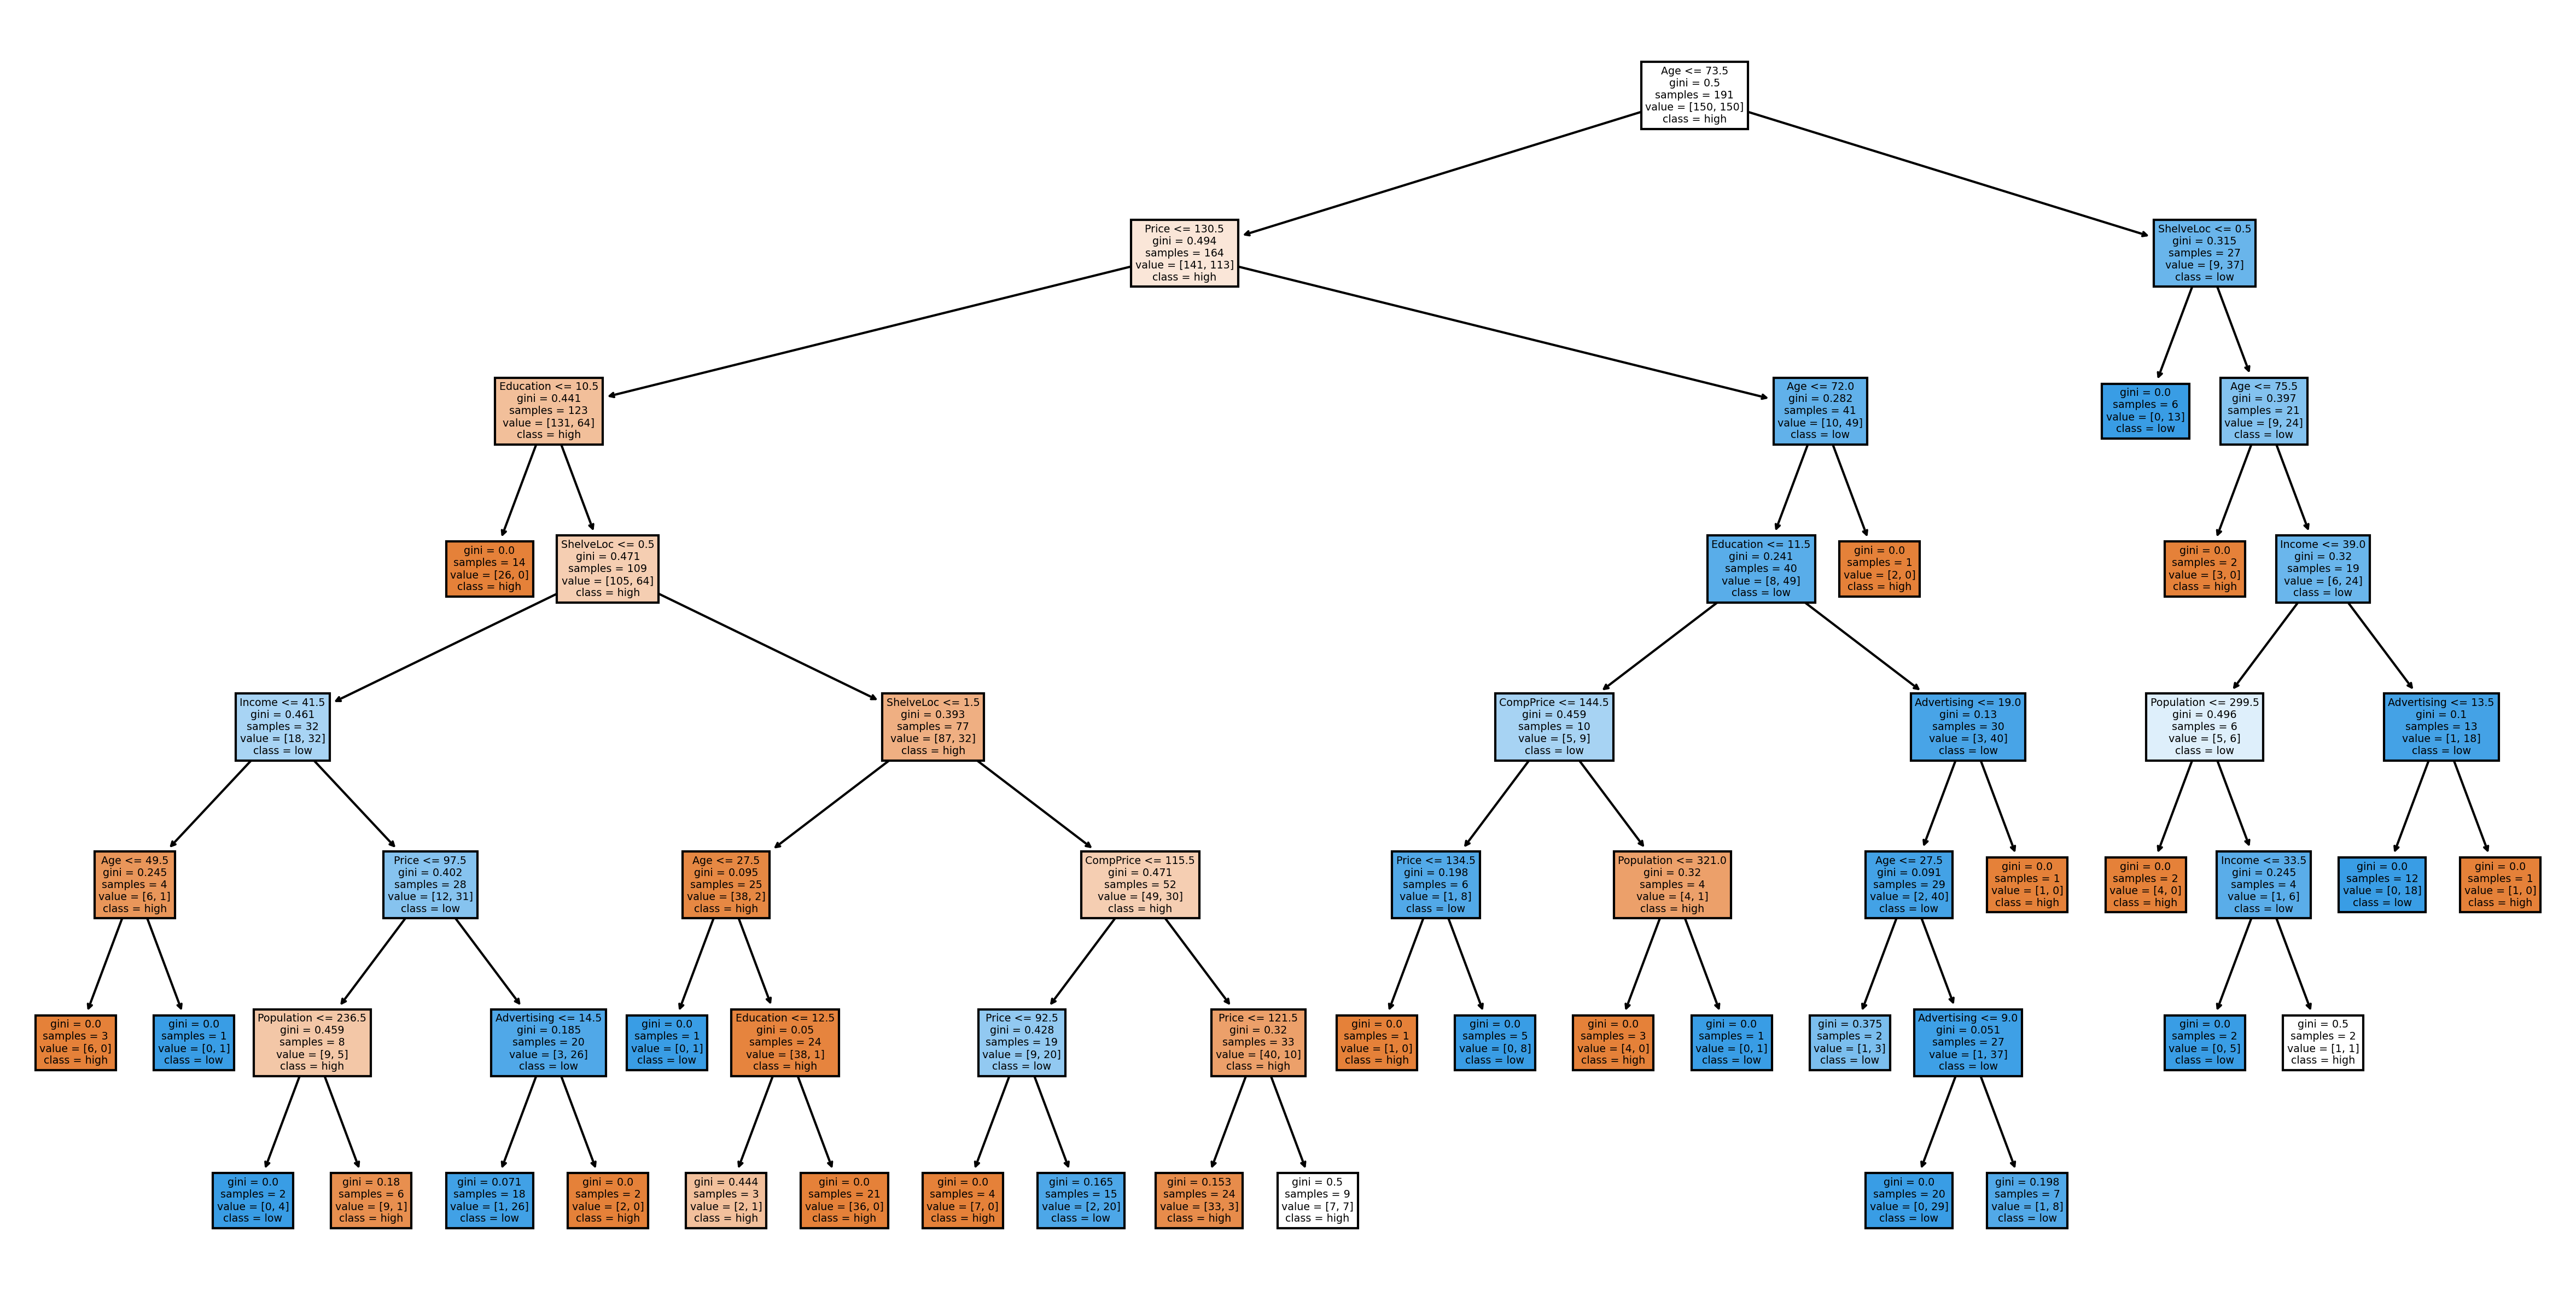

In [69]:
plt.figure(figsize=(20,10),dpi=300)
tree.plot_tree(model2.estimators_[19],filled=True,
               feature_names=['CompPrice' , 'Income' , 'Advertising',  'Population',  
                              'Price',  'ShelveLoc' , 'Age' , 'Education' , 'Urban' , 'US'],
                 class_names=['high','low'] )

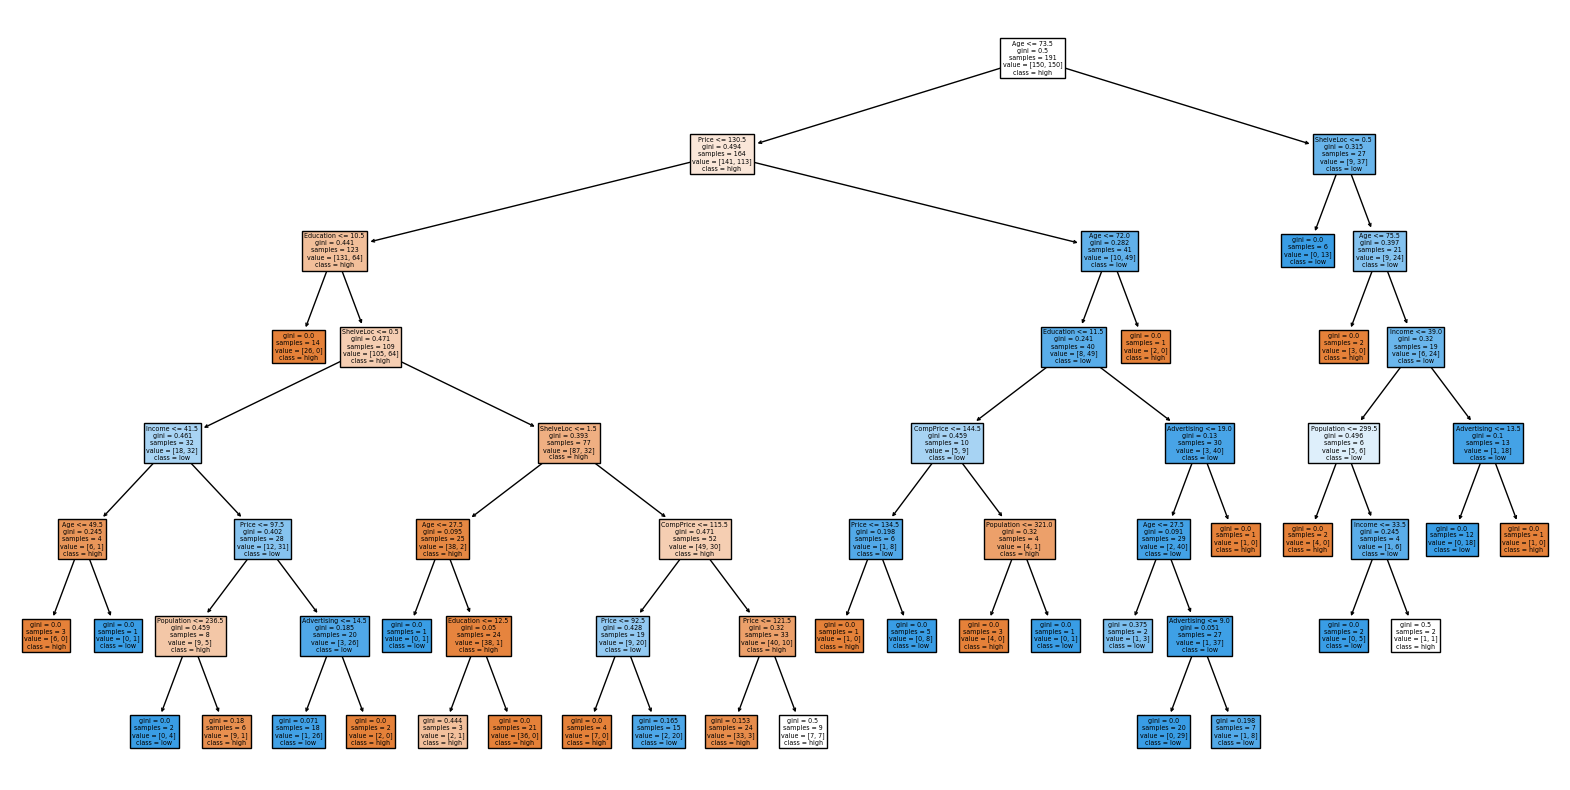

In [70]:
plt.figure(figsize=(20,10))
for i in range(len(model2.estimators_)):
    tree.plot_tree(model2.estimators_[i],filled = True,
                   feature_names=['CompPrice' , 'Income' , 'Advertising',  'Population',  
                              'Price',  'ShelveLoc' , 'Age' , 'Education' , 'Urban' , 'US'],
                   class_names= ['high','low']
                    )

In [71]:
#predicting on test data 
preds = model2.predict(X_test)
pd.Series(preds).value_counts()

high    53
low     47
dtype: int64

In [72]:
preds

array(['high', 'low', 'high', 'low', 'high', 'low', 'high', 'low', 'high',
       'high', 'low', 'high', 'high', 'high', 'low', 'high', 'low',
       'high', 'high', 'low', 'high', 'low', 'low', 'low', 'low', 'high',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'low', 'low', 'high', 'high', 'low', 'low', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'low', 'low', 'high', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'high', 'high',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'low', 'high', 'low', 'high', 'high',
       'low', 'high', 'high', 'high', 'low', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'high',
       'low', 'high', 'low', 'high'], dtype=object)

In [73]:
for i in range(len(model2.estimators_)):
 print(tree.export_text(model2.estimators_[i]))

|--- feature_6 <= 70.50
|   |--- feature_2 <= 7.50
|   |   |--- feature_2 <= 4.50
|   |   |   |--- feature_4 <= 100.50
|   |   |   |   |--- feature_6 <= 59.50
|   |   |   |   |   |--- feature_1 <= 47.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_1 >  47.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_6 >  59.50
|   |   |   |   |   |--- feature_6 <= 60.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_6 >  60.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_4 >  100.50
|   |   |   |   |--- feature_0 <= 137.50
|   |   |   |   |   |--- feature_1 <= 100.50
|   |   |   |   |   |   |--- feature_4 <= 127.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_4 >  127.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_1 >  100.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_0 >  137.50
|   |   |   |   |   |--- featu

In [252]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

        high       0.66      0.86      0.75        43
         low       0.75      0.49      0.59        37

    accuracy                           0.69        80
   macro avg       0.71      0.67      0.67        80
weighted avg       0.70      0.69      0.67        80



# checking accuracy with Bagging classifier

In [269]:
#cross validation using Kfold 
kfold = KFold(n_splits=4)
num_trees = 20
cart = DecisionTreeClassifier()

clf_bg = BaggingClassifier(base_estimator=cart,n_estimators=num_trees)
results = cross_val_score(clf_bg,X_train,Y_train,cv= kfold)
print(results.mean())

0.784375


# checking  accuracy with Adaboost

In [271]:
#cross validation using Kfold 
kfold = KFold(n_splits=4)
num_trees = 20

clf_ad = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(clf_ad,X_train,Y_train,cv= kfold)
print(results.mean())

0.8031250000000001


# checking  accuracy with gradient boosting

In [259]:
#cross validation using Kfold 
kfold = KFold(n_splits=4)
max_features = 6
num_trees = 20

clf_gb = GradientBoostingClassifier(n_estimators=num_trees,max_features=max_features)
results = cross_val_score(clf_gb,X_train,Y_train,cv= kfold)
print(results.mean())

0.7718749999999999


# since adaboost has the best accuracy we choose adaboost and predict

In [261]:
#fitting our adaboost model 
final_model = AdaBoostClassifier(n_estimators=20)

final_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=20)

In [262]:
final_model.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=2144796196),
 DecisionTreeClassifier(max_depth=1, random_state=767788550),
 DecisionTreeClassifier(max_depth=1, random_state=1667619864),
 DecisionTreeClassifier(max_depth=1, random_state=917430282),
 DecisionTreeClassifier(max_depth=1, random_state=1044319184),
 DecisionTreeClassifier(max_depth=1, random_state=392724805),
 DecisionTreeClassifier(max_depth=1, random_state=387674416),
 DecisionTreeClassifier(max_depth=1, random_state=403460869),
 DecisionTreeClassifier(max_depth=1, random_state=1534873458),
 DecisionTreeClassifier(max_depth=1, random_state=1200227767),
 DecisionTreeClassifier(max_depth=1, random_state=1165755646),
 DecisionTreeClassifier(max_depth=1, random_state=255265812),
 DecisionTreeClassifier(max_depth=1, random_state=1671624226),
 DecisionTreeClassifier(max_depth=1, random_state=2049551370),
 DecisionTreeClassifier(max_depth=1, random_state=376087183),
 DecisionTreeClassifier(max_depth=1, random_state=821345128),


[Text(0.5, 0.75, 'Population <= 399.0\ngini = 0.5\nsamples = 320\nvalue = [0.5, 0.5]\nclass = high'),
 Text(0.25, 0.25, 'gini = 0.492\nsamples = 237\nvalue = [0.307, 0.397]\nclass = low'),
 Text(0.75, 0.25, 'gini = 0.454\nsamples = 83\nvalue = [0.193, 0.103]\nclass = high')]

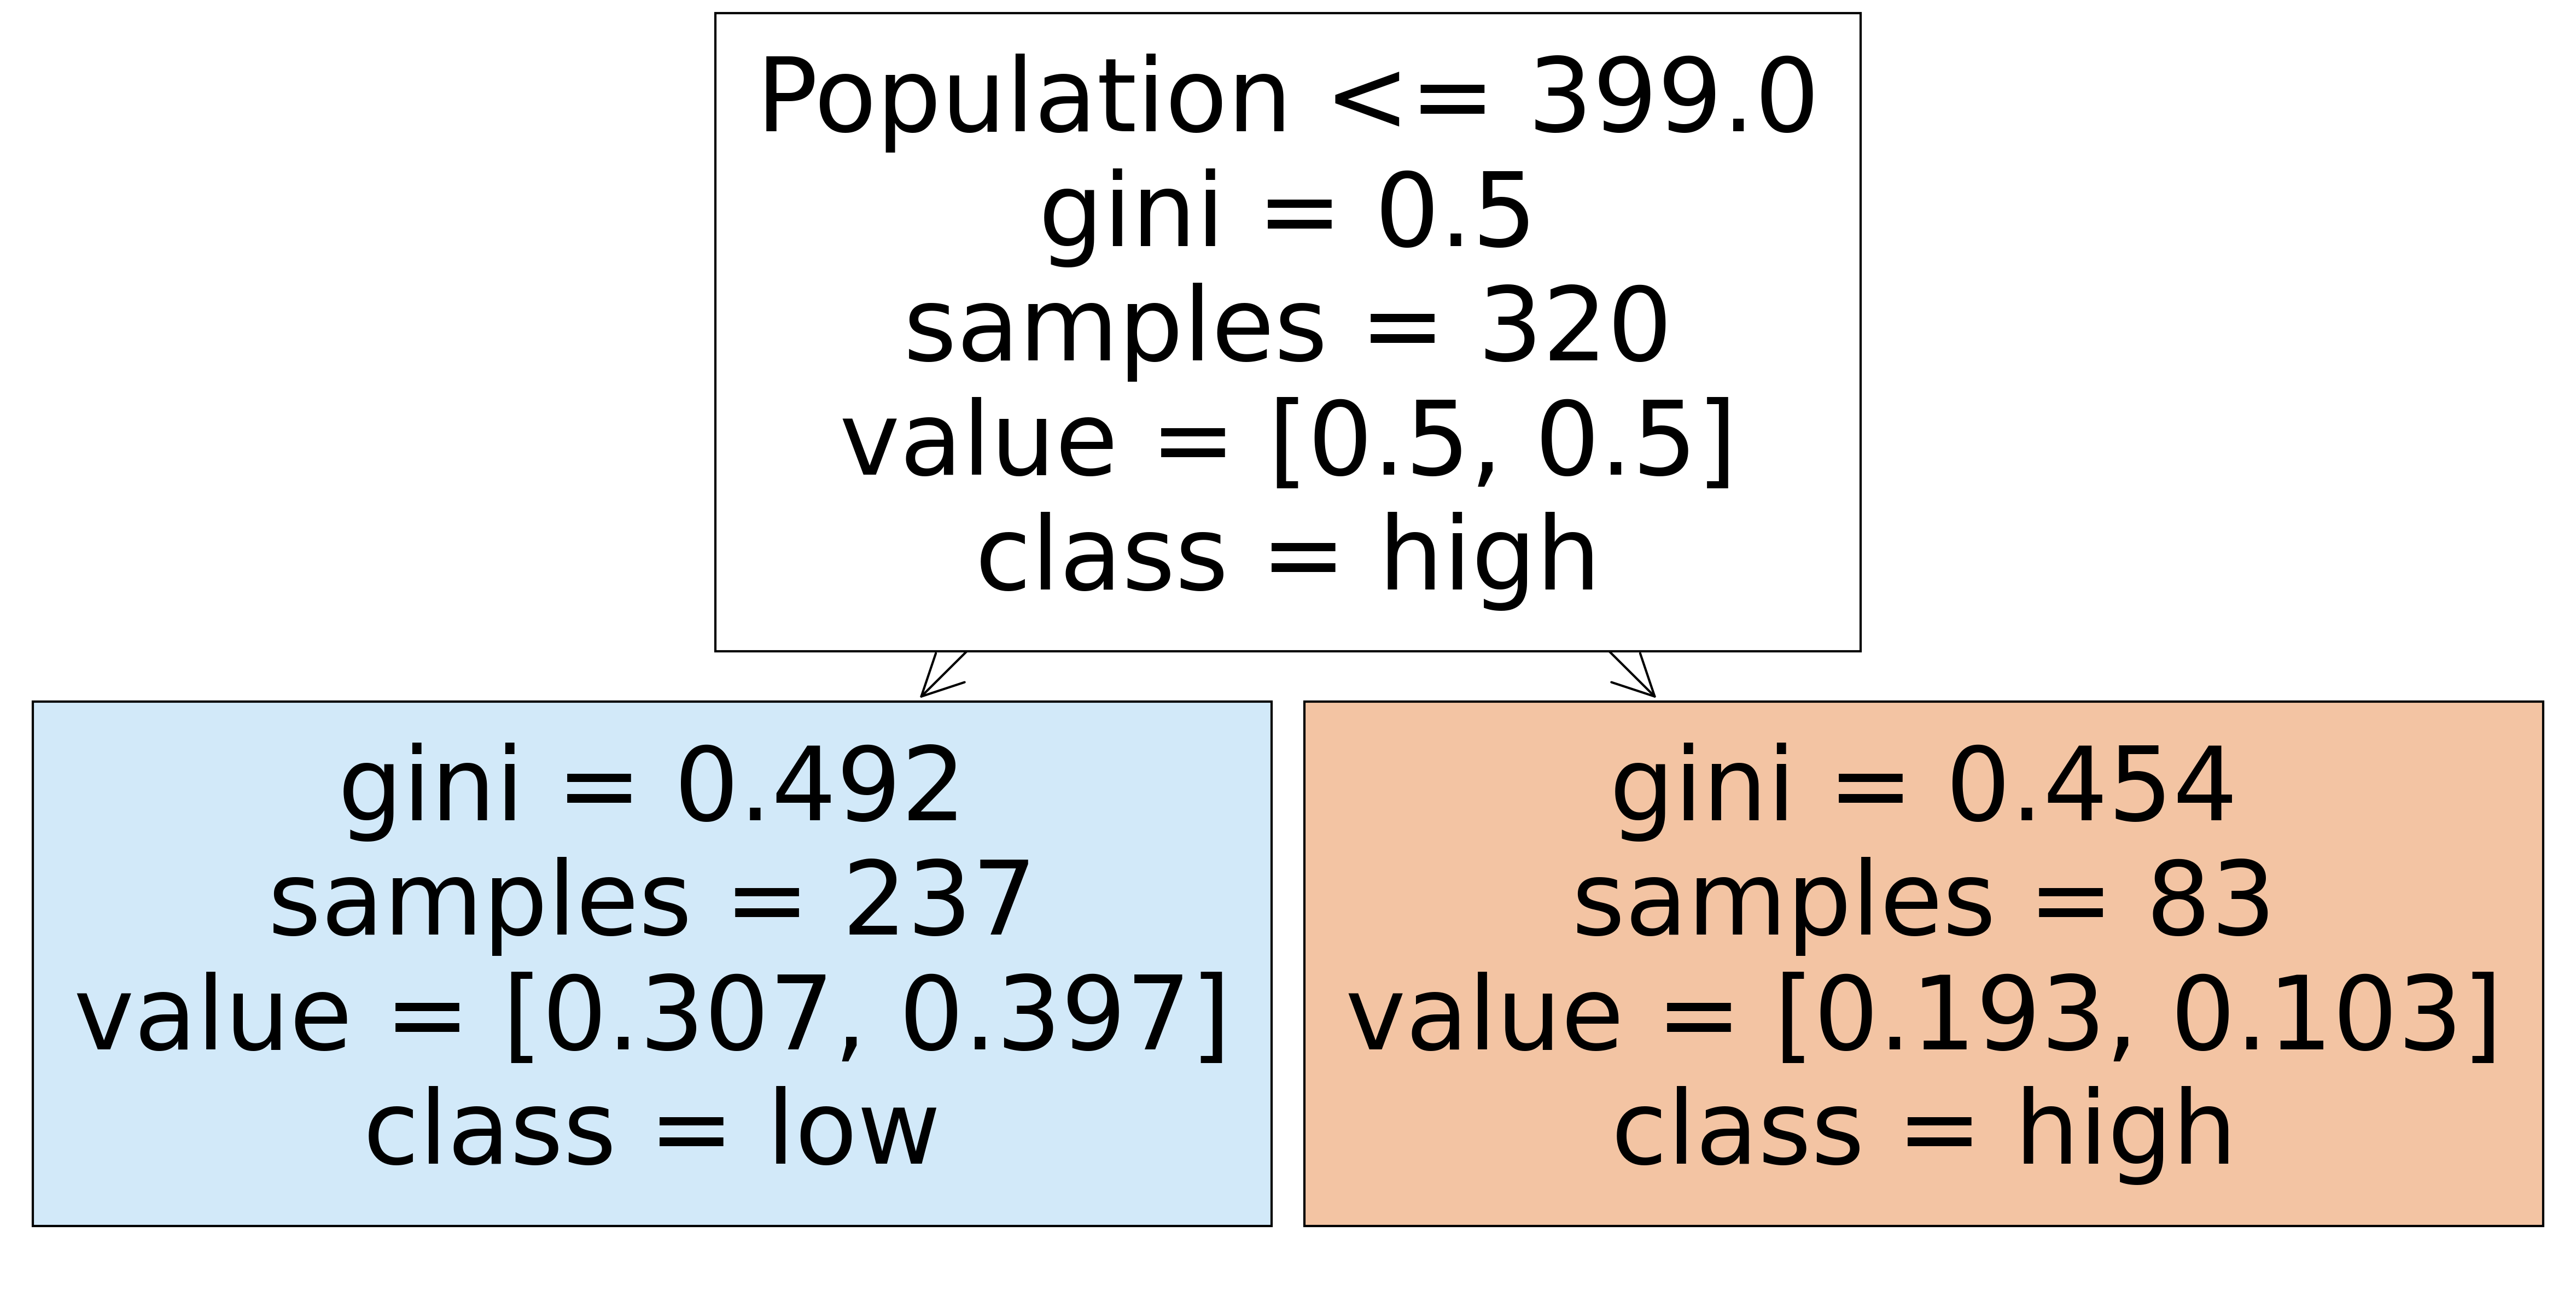

In [263]:
plt.figure(figsize=(20,10),dpi=300)
tree.plot_tree(final_model.estimators_[19],filled=True,
               feature_names=['CompPrice' , 'Income' , 'Advertising',  'Population',  
                              'Price',  'ShelveLoc' , 'Age' , 'Education' , 'Urban' , 'US'],
                 class_names=['high','low'] )

In [264]:
#predicting on test data 
final_pred = final_model.predict(X_test)
pd.Series(final_pred).value_counts()

high    49
low     31
dtype: int64

In [265]:
final_pred

array(['high', 'low', 'high', 'low', 'high', 'low', 'high', 'high',
       'high', 'high', 'low', 'high', 'high', 'high', 'low', 'high',
       'low', 'high', 'high', 'low', 'high', 'low', 'low', 'low', 'high',
       'high', 'low', 'high', 'low', 'low', 'high', 'high', 'low', 'low',
       'high', 'low', 'high', 'high', 'high', 'low', 'low', 'low', 'high',
       'high', 'high', 'low', 'low', 'high', 'low', 'low', 'high', 'high',
       'high', 'high', 'low', 'low', 'low', 'high', 'high', 'high',
       'high', 'high', 'high', 'low', 'low', 'high', 'high', 'low', 'low',
       'high', 'high', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'high'], dtype=object)

In [266]:
for i in range(len(final_model.estimators_)):
 print(tree.export_text(final_model.estimators_[i]))

|--- feature_4 <= 92.50
|   |--- class: high
|--- feature_4 >  92.50
|   |--- class: low

|--- feature_5 <= 0.50
|   |--- class: low
|--- feature_5 >  0.50
|   |--- class: high

|--- feature_4 <= 131.50
|   |--- class: high
|--- feature_4 >  131.50
|   |--- class: low

|--- feature_2 <= 7.50
|   |--- class: low
|--- feature_2 >  7.50
|   |--- class: high

|--- feature_6 <= 63.50
|   |--- class: high
|--- feature_6 >  63.50
|   |--- class: low

|--- feature_0 <= 131.50
|   |--- class: low
|--- feature_0 >  131.50
|   |--- class: high

|--- feature_4 <= 103.50
|   |--- class: high
|--- feature_4 >  103.50
|   |--- class: low

|--- feature_0 <= 109.50
|   |--- class: low
|--- feature_0 >  109.50
|   |--- class: high

|--- feature_5 <= 1.50
|   |--- class: high
|--- feature_5 >  1.50
|   |--- class: low

|--- feature_5 <= 0.50
|   |--- class: low
|--- feature_5 >  0.50
|   |--- class: high

|--- feature_4 <= 127.50
|   |--- class: high
|--- feature_4 >  127.50
|   |--- class: low

|--- fea

In [267]:
print(classification_report(Y_test,final_pred))

              precision    recall  f1-score   support

        high       0.78      0.88      0.83        43
         low       0.84      0.70      0.76        37

    accuracy                           0.80        80
   macro avg       0.81      0.79      0.80        80
weighted avg       0.80      0.80      0.80        80



# conclusions 

# 1) accuracy of random forest  was less compared to methods like bagging,adaboost and gradient boosting

# 2) adaboost and gradient boosting are sequential slow learners leading to strong learner , hence our accuracy improvises our model

# 3) according to tree we also observe sales are divided into high or low according  to division of population 